<a href="https://colab.research.google.com/github/Abhijeet2121/Abhijeet2121/blob/main/Programming_Languages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [2]:
import pandas as pd
import matplotlib as plt


## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [26]:
df = pd.read_csv("QueryResults.csv", names=["DATE", "TAG", "POSTS"])

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [15]:
df.head()
df.tail()

,DATE,TAG,POST
1987,2020-07-01 00:00:00,r,5694.0
1988,2020-07-01 00:00:00,go,743.0
1989,2020-07-01 00:00:00,ruby,775.0
1990,2020-07-01 00:00:00,perl,182.0
1991,2020-07-01 00:00:00,swift,3607.0


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [6]:
df.shape

(1991, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [17]:
df.columns
df.count()

DATE    1992
TAG     1992
POST    1991
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [18]:
df.groupby('TAG').sum()

<ipython-input-18-e0b10c91de87>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('TAG').sum()


,POST
TAG,
TagName,0.0
assembly,34852.0
c,336042.0
c#,1423530.0
c++,684210.0
delphi,46212.0
go,47499.0
java,1696403.0
javascript,2056510.0


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [19]:
df.groupby('TAG').count()

,DATE,POST
TAG,,
TagName,1,0
assembly,144,144
c,144,144
c#,145,145
c++,144,144
delphi,144,144
go,129,129
java,144,144
javascript,144,144


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [20]:
df['DATE'][1]

'2008-07-01 00:00:00'

In [22]:
type(df['DATE'][1])

str

In [23]:
pd.to_datetime(df['DATE'][1])
df.DATE = pd.to_datetime(df['DATE'][1])
df.head()

Timestamp('2008-07-01 00:00:00')

## Data Manipulation



In [27]:
df_reshaped = df.pivot(index="DATE", columns="TAG", values= "POSTS")

**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [ ]:
df_reshaped.shape()

In [ ]:
df_reshaped.columns 

In [28]:
df_reshaped.head()

TAG,TagName,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,,
2008-07-01 00:00:00,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01 00:00:00,NaN,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01 00:00:00,NaN,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01 00:00:00,NaN,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01 00:00:00,NaN,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [31]:
df_reshaped.fillna(0, inplace = True)


TAG,TagName,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,,
2008-07-01 00:00:00,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01 00:00:00,0.0,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01 00:00:00,0.0,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01 00:00:00,0.0,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01 00:00:00,0.0,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0


In [32]:
df_reshaped.head()

False

In [ ]:
df_reshaped.isna().values.any()

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

In [37]:
import matplotlib.pyplot as plt 

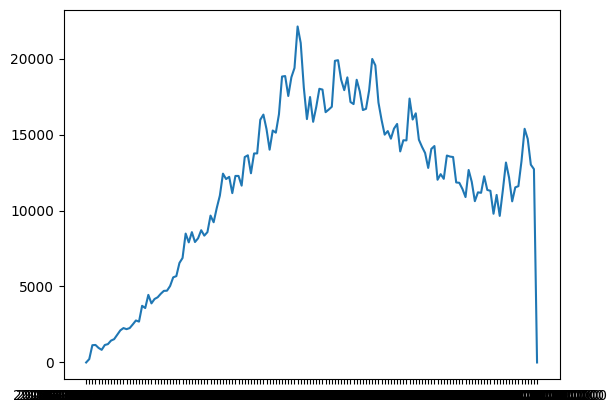

In [38]:
plt.plot(df_reshaped.index, df_reshaped['java'])

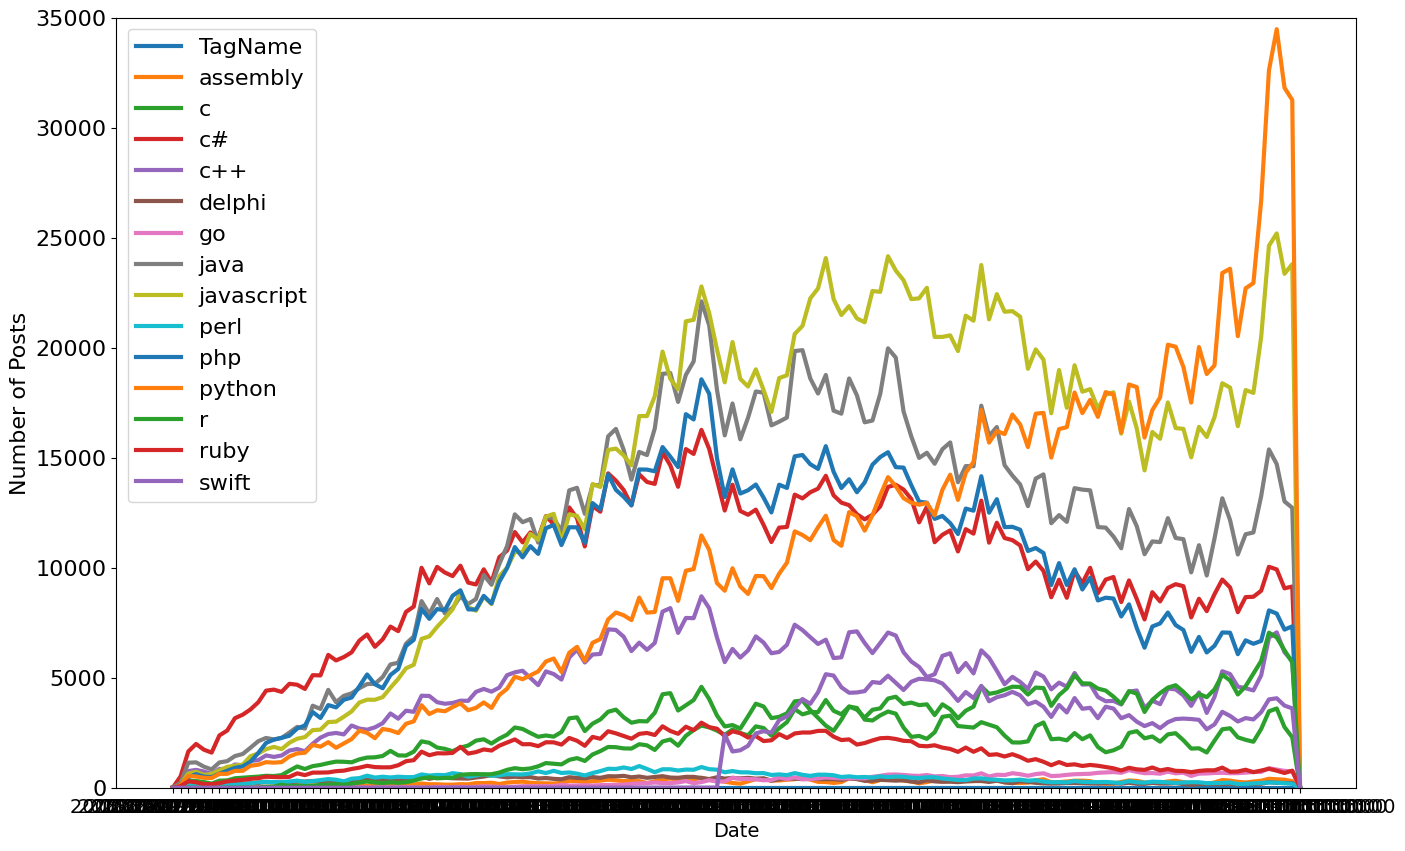

In [55]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=(14))
plt.yticks(fontsize=(16))
plt.xlabel('Date',fontsize=(14))
plt.ylabel('Number of Posts', fontsize=16)
plt.ylim(0,35000)

#ploting all programming langs
for column in df_reshaped.columns:
  plt.plot(df_reshaped.index, df_reshaped[column] 
           ,linewidth=3, label=df_reshaped[column].name)
 
plt.legend(fontsize=16) 

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

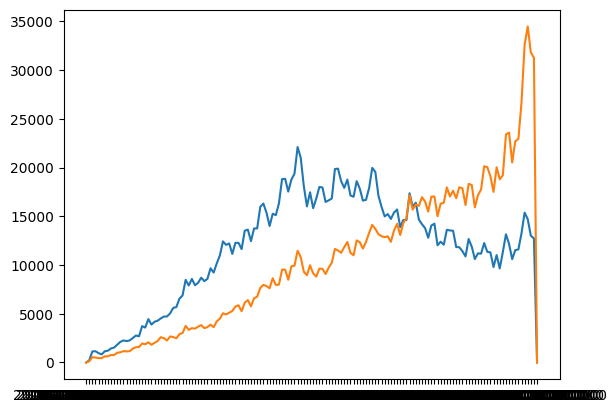

In [46]:
plt.plot(df_reshaped.index, df_reshaped['java'])
plt.plot(df_reshaped.index, df_reshaped['python'])

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

In [60]:
roll_df = df_reshaped.rolling(window= 3).mean()

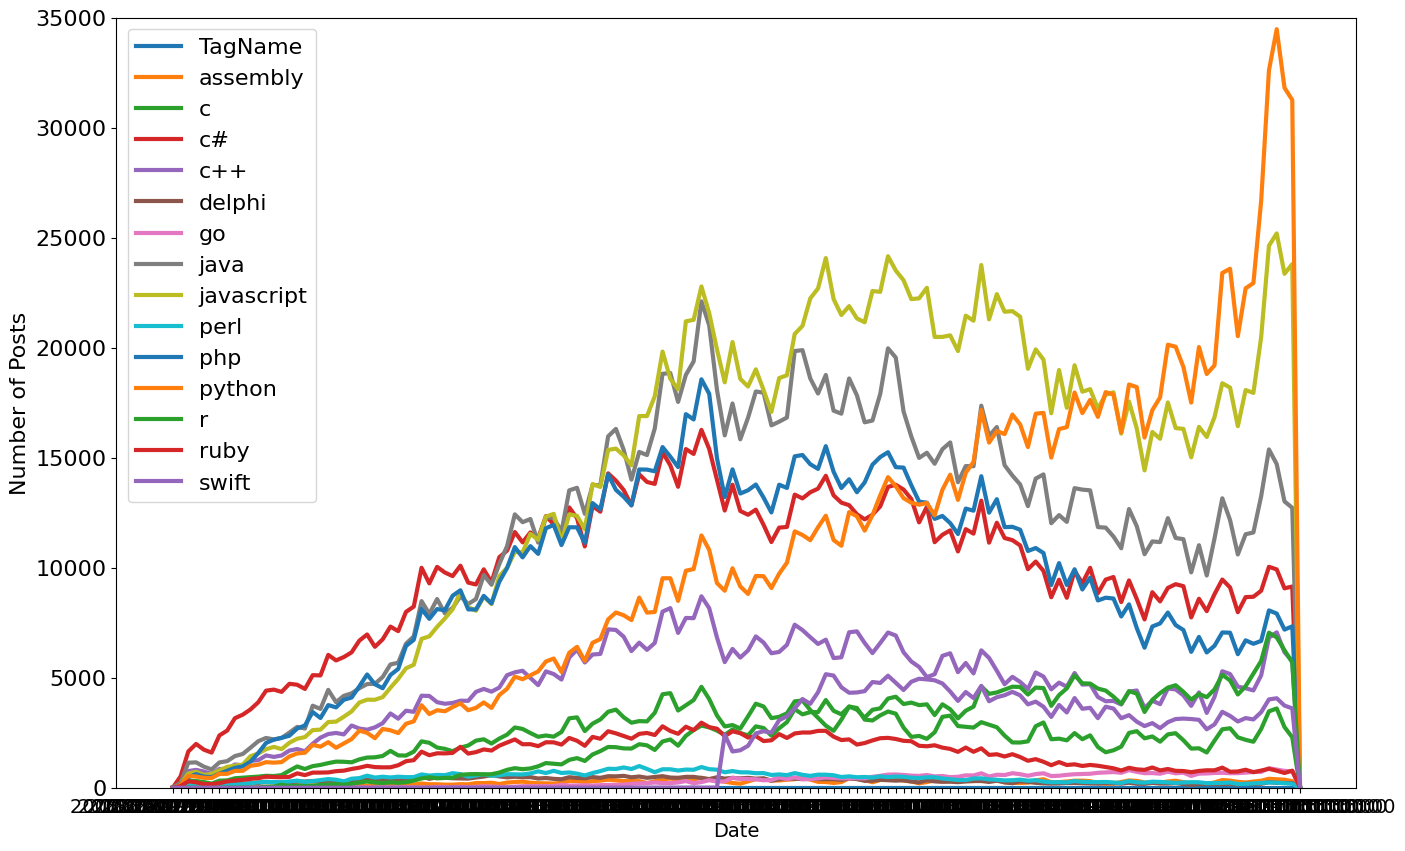

In [61]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=(14))
plt.yticks(fontsize=(16))
plt.xlabel('Date',fontsize=(14))
plt.ylabel('Number of Posts', fontsize=16)
plt.ylim(0,35000)

#ploting all programming langs
for column in df_reshaped.columns:
  plt.plot(df_reshaped.index, df_reshaped[column] 
           ,linewidth=3, label=df_reshaped[column].name)
 
plt.legend(fontsize=16) 